# 🔍 EDA y ETL - Dataset E-commerce Brasil (Ultra-Optimizado)

## Análisis Exploratorio de Datos y Extracción, Transformación y Carga

Este notebook realiza un análisis completo del dataset de e-commerce brasileño con optimizaciones ultra-agresivas de memoria:
- Descarga del dataset desde Kaggle
- Análisis exploratorio de datos (EDA)
- Proceso de ETL ultra-optimizado con procesamiento en chunks
- Carga de datos en MongoDB con información completa

In [23]:
# 1. 📥 Importar librerías y configurar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pymongo import MongoClient
import kagglehub
from tqdm import tqdm
import warnings
import gc
warnings.filterwarnings('ignore')

# Configurar pandas para optimizar memoria
pd.options.mode.chained_assignment = None

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [24]:
# 2. 📥 Descargar dataset de Kaggle
print("📥 Descargando dataset de Kaggle...")

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print(f"✅ Dataset descargado en: {path}")

# Listar archivos disponibles
import os
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"📁 Archivos disponibles: {files}")

📥 Descargando dataset de Kaggle...
✅ Dataset descargado en: C:\Users\axel_\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2
📁 Archivos disponibles: ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [25]:
# 3. 📖 Cargar archivos CSV con optimización ultra-agresiva
print("📖 Cargando archivos CSV con optimización ultra-agresiva...")

def ultra_optimize_dtypes(df):
    """Optimización ultra-agresiva de tipos de datos"""
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].nunique() / len(df) < 0.3:
                df[col] = df[col].astype('category')
        elif df[col].dtype == 'int64':
            if df[col].min() >= 0:
                if df[col].max() < 255:
                    df[col] = df[col].astype('uint8')
                elif df[col].max() < 65535:
                    df[col] = df[col].astype('uint16')
                else:
                    df[col] = df[col].astype('uint32')
            else:
                if df[col].min() > -128 and df[col].max() < 127:
                    df[col] = df[col].astype('int8')
                elif df[col].min() > -32768 and df[col].max() < 32767:
                    df[col] = df[col].astype('int16')
                else:
                    df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

# Cargar cada archivo CSV con optimización
print("📊 Cargando órdenes...")
orders_df = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
orders_df = ultra_optimize_dtypes(orders_df)

print("📦 Cargando items...")
order_items_df = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
order_items_df = ultra_optimize_dtypes(order_items_df)

print("🛍️ Cargando productos...")
products_df = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))
products_df = ultra_optimize_dtypes(products_df)

print("👥 Cargando clientes...")
customers_df = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))
customers_df = ultra_optimize_dtypes(customers_df)

print("🏪 Cargando vendedores...")
sellers_df = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
sellers_df = ultra_optimize_dtypes(sellers_df)

print("💳 Cargando pagos...")
payments_df = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))
payments_df = ultra_optimize_dtypes(payments_df)

print("⭐ Cargando reviews...")
reviews_df = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
reviews_df = ultra_optimize_dtypes(reviews_df)

print("🌐 Cargando traducciones...")
category_translation_df = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))
category_translation_df = ultra_optimize_dtypes(category_translation_df)

print(f"\n📊 Resumen de datasets:")
print(f"📊 Órdenes: {orders_df.shape} - {orders_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"📦 Items: {order_items_df.shape} - {order_items_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"🛍️ Productos: {products_df.shape} - {products_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"👥 Clientes: {customers_df.shape} - {customers_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"🏪 Vendedores: {sellers_df.shape} - {sellers_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"💳 Pagos: {payments_df.shape} - {payments_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"⭐ Reviews: {reviews_df.shape} - {reviews_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

📖 Cargando archivos CSV con optimización ultra-agresiva...
📊 Cargando órdenes...
📦 Cargando items...
🛍️ Cargando productos...
👥 Cargando clientes...
🏪 Cargando vendedores...
💳 Cargando pagos...
⭐ Cargando reviews...
🌐 Cargando traducciones...

📊 Resumen de datasets:
📊 Órdenes: (99441, 8) - 41.3 MB
📦 Items: (112650, 7) - 21.5 MB
🛍️ Productos: (32951, 9) - 3.5 MB
👥 Clientes: (99441, 5) - 16.4 MB
🏪 Vendedores: (3095, 4) - 0.3 MB
💳 Pagos: (103886, 5) - 8.7 MB
⭐ Reviews: (99224, 7) - 29.5 MB


In [16]:
# 4. 🔍 EDA Básico
print("🔍 INFORMACIÓN GENERAL DE LOS DATASETS")
print("=" * 50)

datasets = {
    'Órdenes': orders_df,
    'Items': order_items_df,
    'Productos': products_df,
    'Clientes': customers_df,
    'Vendedores': sellers_df,
    'Pagos': payments_df,
    'Reviews': reviews_df
}

for name, df in datasets.items():
    print(f"\n📊 {name}:")
    print(f"   Filas: {df.shape[0]:,}")
    print(f"   Columnas: {df.shape[1]}")
    print(f"   Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"   Valores nulos: {df.isnull().sum().sum()}")
    print(f"   Columnas: {list(df.columns)}")

🔍 INFORMACIÓN GENERAL DE LOS DATASETS

📊 Órdenes:
   Filas: 99,441
   Columnas: 8
   Memoria: 41.32 MB
   Valores nulos: 4908
   Columnas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

📊 Items:
   Filas: 112,650
   Columnas: 7
   Memoria: 21.47 MB
   Valores nulos: 0
   Columnas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

📊 Productos:
   Filas: 32,951
   Columnas: 9
   Memoria: 3.46 MB
   Valores nulos: 2448
   Columnas: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

📊 Clientes:
   Filas: 99,441
   Columnas: 5
   Memoria: 16.39 MB
   Valores nulos: 0
   Columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'cu

In [26]:
# 5. 🔄 Proceso ETL Ultra-Optimizado - JOINs por chunks
print("🔄 Iniciando proceso ETL ultra-optimizado...")

# Paso 1: Traducir categorías de productos
print("📝 Traduciendo categorías de productos...")
products_df = products_df.merge(
    category_translation_df, 
    on='product_category_name', 
    how='left'
)
gc.collect()  # Liberar memoria

print("✅ JOINs de traducciones completados")

🔄 Iniciando proceso ETL ultra-optimizado...
📝 Traduciendo categorías de productos...
✅ JOINs de traducciones completados


In [27]:
# 6. 🔗 Crear dataset consolidado con JOINs ultra-optimizados
print("🔗 Creando dataset consolidado con JOINs ultra-optimizados...")

# Estrategia: Procesar en chunks muy pequeños para evitar problemas de memoria
CHUNK_SIZE = 1000  # Solo 1000 registros por chunk

# Crear lista para almacenar resultados
all_chunks = []

# Procesar order_items en chunks
total_chunks = len(order_items_df) // CHUNK_SIZE + 1

with tqdm(total=total_chunks, desc="Procesando chunks") as pbar:
    for i in range(0, len(order_items_df), CHUNK_SIZE):
        # Tomar chunk de order_items
        chunk = order_items_df.iloc[i:i + CHUNK_SIZE].copy()
        
        # JOIN con orders
        chunk = chunk.merge(orders_df, on='order_id', how='inner')
        
        # JOIN con customers
        chunk = chunk.merge(customers_df, on='customer_id', how='left')
        
        # JOIN con products
        chunk = chunk.merge(products_df, on='product_id', how='left')
        
        # JOIN con sellers
        chunk = chunk.merge(sellers_df, on='seller_id', how='left')
        
        # JOIN con payments
        chunk = chunk.merge(payments_df, on='order_id', how='left')
        
        # JOIN con reviews
        chunk = chunk.merge(reviews_df, on='order_id', how='left')
        
        # Renombrar columnas
        column_mapping = {
            'order_id': 'id_orden',
            'order_item_id': 'id_item',
            'product_id': 'id_producto',
            'seller_id': 'id_vendedor',
            'customer_id': 'id_cliente',
            'customer_unique_id': 'id_cliente_unico',
            'order_purchase_timestamp': 'fecha_compra',
            'order_status': 'estado_orden',
            'price': 'precio',
            'freight_value': 'costo_envio',
            'product_category_name_english': 'categoria_producto',
            'product_name_lenght': 'longitud_nombre',
            'product_description_lenght': 'longitud_descripcion',
            'product_photos_qty': 'cantidad_fotos',
            'product_weight_g': 'peso_gramos',
            'product_length_cm': 'longitud_cm',
            'product_height_cm': 'altura_cm',
            'product_width_cm': 'ancho_cm',
            'customer_city': 'ciudad_cliente',
            'customer_state': 'estado_cliente',
            'seller_city': 'ciudad_vendedor',
            'seller_state': 'estado_vendedor',
            'payment_type': 'tipo_pago',
            'payment_installments': 'cuotas_pago',
            'review_score': 'puntuacion_review',
            'review_comment_message': 'comentario_review'
        }
        
        chunk = chunk.rename(columns=column_mapping)
        
        # Calcular campos derivados
        chunk['precio_total'] = chunk['precio'] + chunk['costo_envio']
        chunk['volumen_cm3'] = (
            chunk['longitud_cm'].fillna(0) * 
            chunk['altura_cm'].fillna(0) * 
            chunk['ancho_cm'].fillna(0)
        )
        chunk['cantidad_stock'] = np.random.randint(0, 100, len(chunk))
        
        # Limpiar valores nulos críticos
        chunk.dropna(subset=['fecha_compra', 'precio'], inplace=True)
        
        # Agregar a la lista
        all_chunks.append(chunk)
        
        # Liberar memoria del chunk
        del chunk
        gc.collect()
        
        pbar.update(1)

# Combinar todos los chunks
print("\n🔗 Combinando chunks...")
ventas_consolidado = pd.concat(all_chunks, ignore_index=True)
del all_chunks
gc.collect()

print(f"✅ Dataset consolidado: {ventas_consolidado.shape}")
print(f"📋 Columnas finales: {list(ventas_consolidado.columns)}")
print(f"💾 Memoria utilizada: {ventas_consolidado.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

🔗 Creando dataset consolidado con JOINs ultra-optimizados...


Procesando chunks: 100%|████████████████████████████████████| 113/113 [00:36<00:00,  3.12it/s]



🔗 Combinando chunks...
✅ Dataset consolidado: (118310, 43)
📋 Columnas finales: ['id_orden', 'id_item', 'id_producto', 'id_vendedor', 'shipping_limit_date', 'precio', 'costo_envio', 'id_cliente', 'estado_orden', 'fecha_compra', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'id_cliente_unico', 'customer_zip_code_prefix', 'ciudad_cliente', 'estado_cliente', 'product_category_name', 'longitud_nombre', 'longitud_descripcion', 'cantidad_fotos', 'peso_gramos', 'longitud_cm', 'altura_cm', 'ancho_cm', 'categoria_producto', 'seller_zip_code_prefix', 'ciudad_vendedor', 'estado_vendedor', 'payment_sequential', 'tipo_pago', 'cuotas_pago', 'payment_value', 'review_id', 'puntuacion_review', 'review_comment_title', 'comentario_review', 'review_creation_date', 'review_answer_timestamp', 'precio_total', 'volumen_cm3', 'cantidad_stock']
💾 Memoria utilizada: 135.1 MB


In [28]:
# 7. 🧹 Limpieza y transformación de datos optimizada
print("🧹 Limpiando y transformando datos...")

# Crear copia para limpieza
ventas_limpio = ventas_consolidado.copy()
del ventas_consolidado  # Liberar memoria
gc.collect()

# Optimizar tipos de datos finales
ventas_limpio = ultra_optimize_dtypes(ventas_limpio)

print(f"✅ Dataset limpio: {ventas_limpio.shape}")
print(f"📋 Columnas finales: {list(ventas_limpio.columns)}")
print(f"💾 Memoria final: {ventas_limpio.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

🧹 Limpiando y transformando datos...
✅ Dataset limpio: (118310, 43)
📋 Columnas finales: ['id_orden', 'id_item', 'id_producto', 'id_vendedor', 'shipping_limit_date', 'precio', 'costo_envio', 'id_cliente', 'estado_orden', 'fecha_compra', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'id_cliente_unico', 'customer_zip_code_prefix', 'ciudad_cliente', 'estado_cliente', 'product_category_name', 'longitud_nombre', 'longitud_descripcion', 'cantidad_fotos', 'peso_gramos', 'longitud_cm', 'altura_cm', 'ancho_cm', 'categoria_producto', 'seller_zip_code_prefix', 'ciudad_vendedor', 'estado_vendedor', 'payment_sequential', 'tipo_pago', 'cuotas_pago', 'payment_value', 'review_id', 'puntuacion_review', 'review_comment_title', 'comentario_review', 'review_creation_date', 'review_answer_timestamp', 'precio_total', 'volumen_cm3', 'cantidad_stock']
💾 Memoria final: 106.2 MB


In [29]:
# 8. 📊 Análisis de datos consolidados
print("📊 Análisis de datos consolidados")
print("=" * 40)

# Información básica
print(f"📈 Total de ventas: {len(ventas_limpio):,}")
print(f"👥 Clientes únicos: {ventas_limpio['id_cliente_unico'].nunique():,}")
print(f"🛍️ Productos únicos: {ventas_limpio['id_producto'].nunique():,}")
print(f"🏪 Vendedores únicos: {ventas_limpio['id_vendedor'].nunique():,}")
print(f"🏙️ Ciudades de clientes: {ventas_limpio['ciudad_cliente'].nunique():,}")
print(f"💰 Ingresos totales: R$ {ventas_limpio['precio_total'].sum():,.2f}")
print(f"📦 Valor promedio por venta: R$ {ventas_limpio['precio_total'].mean():.2f}")

# Rango de fechas
ventas_limpio['fecha_compra'] = pd.to_datetime(ventas_limpio['fecha_compra'])
print(f"📅 Rango de fechas: {ventas_limpio['fecha_compra'].min()} a {ventas_limpio['fecha_compra'].max()}")

📊 Análisis de datos consolidados
📈 Total de ventas: 118,310
👥 Clientes únicos: 95,420
🛍️ Productos únicos: 32,951
🏪 Vendedores únicos: 3,095
🏙️ Ciudades de clientes: 4,110
💰 Ingresos totales: R$ 16,643,733.00
📦 Valor promedio por venta: R$ 140.68
📅 Rango de fechas: 2016-09-04 21:15:19 a 2018-09-03 09:06:57


📈 Creando visualizaciones...
📋 Columnas disponibles: ['id_orden', 'id_item', 'id_producto', 'id_vendedor', 'shipping_limit_date', 'precio', 'costo_envio', 'id_cliente', 'estado_orden', 'fecha_compra', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'id_cliente_unico', 'customer_zip_code_prefix', 'ciudad_cliente', 'estado_cliente', 'product_category_name', 'longitud_nombre', 'longitud_descripcion', 'cantidad_fotos', 'peso_gramos', 'longitud_cm', 'altura_cm', 'ancho_cm', 'categoria_producto', 'seller_zip_code_prefix', 'ciudad_vendedor', 'estado_vendedor', 'payment_sequential', 'tipo_pago', 'cuotas_pago', 'payment_value', 'review_id', 'puntuacion_review', 'review_comment_title', 'comentario_review', 'review_creation_date', 'review_answer_timestamp', 'precio_total', 'volumen_cm3', 'cantidad_stock']


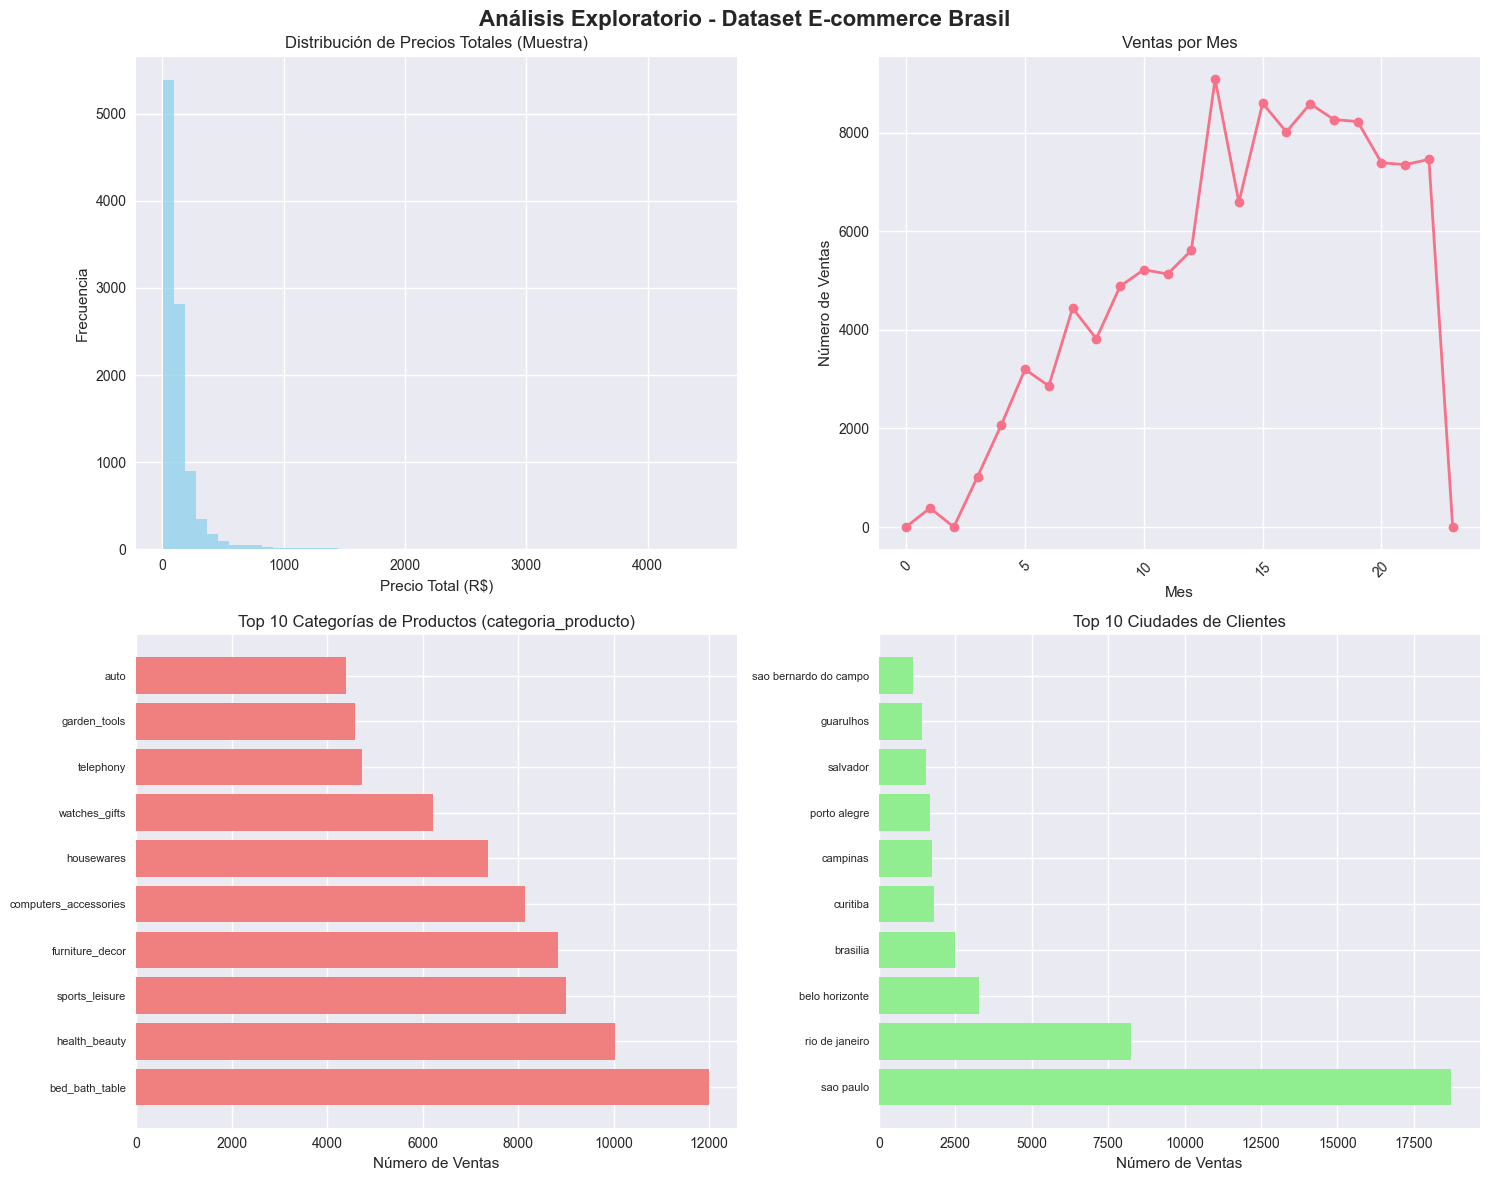

✅ Visualizaciones completadas

📊 Información de columnas:
  Total columnas: 43
  Columnas con 'categoria': ['categoria_producto']
  Columnas con 'category': ['product_category_name']


In [30]:
# 9. 📈 Visualizaciones del EDA (optimizadas y corregidas)
print("📈 Creando visualizaciones...")

# Verificar columnas disponibles
print(f"📋 Columnas disponibles: {list(ventas_limpio.columns)}")

# Configurar figura
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Exploratorio - Dataset E-commerce Brasil', fontsize=16, fontweight='bold')

# 1. Distribución de precios (muestra para optimizar)
sample_prices = ventas_limpio['precio_total'].sample(n=min(10000, len(ventas_limpio)))
axes[0, 0].hist(sample_prices, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribución de Precios Totales (Muestra)')
axes[0, 0].set_xlabel('Precio Total (R$)')
axes[0, 0].set_ylabel('Frecuencia')

# 2. Ventas por mes
ventas_por_mes = ventas_limpio.groupby(ventas_limpio['fecha_compra'].dt.to_period('M')).size()
axes[0, 1].plot(range(len(ventas_por_mes)), ventas_por_mes.values, marker='o', linewidth=2)
axes[0, 1].set_title('Ventas por Mes')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Número de Ventas')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 10 categorías de productos (verificar columna disponible)
categoria_col = None
for col in ['categoria_producto', 'product_category_name_english', 'product_category_name']:
    if col in ventas_limpio.columns:
        categoria_col = col
        break

if categoria_col:
    top_categorias = ventas_limpio[categoria_col].value_counts().head(10)
    axes[1, 0].barh(range(len(top_categorias)), top_categorias.values, color='lightcoral')
    axes[1, 0].set_yticks(range(len(top_categorias)))
    axes[1, 0].set_yticklabels(top_categorias.index, fontsize=8)
    axes[1, 0].set_title(f'Top 10 Categorías de Productos ({categoria_col})')
    axes[1, 0].set_xlabel('Número de Ventas')
else:
    axes[1, 0].text(0.5, 0.5, 'No hay datos de categorías disponibles', 
                   ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Top 10 Categorías de Productos')

# 4. Top 10 ciudades de clientes
top_ciudades = ventas_limpio['ciudad_cliente'].value_counts().head(10)
axes[1, 1].barh(range(len(top_ciudades)), top_ciudades.values, color='lightgreen')
axes[1, 1].set_yticks(range(len(top_ciudades)))
axes[1, 1].set_yticklabels(top_ciudades.index, fontsize=8)
axes[1, 1].set_title('Top 10 Ciudades de Clientes')
axes[1, 1].set_xlabel('Número de Ventas')

plt.tight_layout()
plt.show()

print("✅ Visualizaciones completadas")

# Mostrar información adicional sobre las columnas
print(f"\n📊 Información de columnas:")
print(f"  Total columnas: {len(ventas_limpio.columns)}")
print(f"  Columnas con 'categoria': {[col for col in ventas_limpio.columns if 'categoria' in col.lower()]}")
print(f"  Columnas con 'category': {[col for col in ventas_limpio.columns if 'category' in col.lower()]}")

In [31]:
# 10. 🔌 Conectar a MongoDB
print("🔌 Conectando a MongoDB...")

try:
    # Conectar al nodo primario directamente
    client = MongoClient('mongodb://localhost:27020/', 
                        directConnection=True,
                        serverSelectionTimeoutMS=5000)
    
    # Verificar conexión
    client.admin.command('ping')
    print("✅ Conexión exitosa a MongoDB")
    
    # Seleccionar base de datos
    db = client['ecommerce_brazil']
    collection = db['ventas']
    
    print(f"📊 Base de datos: {db.name}")
    print(f"📋 Colección: {collection.name}")
    
except Exception as e:
    print(f"❌ Error de conexión: {e}")
    print("💡 Asegúrate de que el cluster MongoDB esté ejecutándose")
    print("   docker-compose -f docker/docker-compose.yml up -d")

🔌 Conectando a MongoDB...
✅ Conexión exitosa a MongoDB
📊 Base de datos: ecommerce_brazil
📋 Colección: ventas


In [32]:
# 11. 📤 Cargar datos en MongoDB (ultra-optimizado por lotes)
print("📤 Cargando datos en MongoDB...")

# Limpiar colección existente
collection.delete_many({})
print("🧹 Colección limpiada")

# Convertir DataFrame a documentos JSON por lotes ultra-pequeños
batch_size = 100  # Lotes muy pequeños para evitar problemas de memoria
inserted_count = 0
total_documents = len(ventas_limpio)

with tqdm(total=total_documents, desc="Insertando documentos") as pbar:
    for i in range(0, total_documents, batch_size):
        # Procesar lote
        batch_df = ventas_limpio.iloc[i:i + batch_size]
        batch_documents = batch_df.to_dict('records')
        
        # Insertar lote
        result = collection.insert_many(batch_documents)
        inserted_count += len(result.inserted_ids)
        
        # Actualizar progreso
        pbar.update(len(batch_documents))
        
        # Liberar memoria del lote
        del batch_df, batch_documents
        gc.collect()

print(f"✅ {inserted_count:,} documentos insertados exitosamente")
print(f"📊 Total en colección: {collection.count_documents({}):,}")

# Liberar memoria del DataFrame principal
del ventas_limpio
gc.collect()

📤 Cargando datos en MongoDB...
🧹 Colección limpiada


Insertando documentos: 100%|█████████████████████████| 118310/118310 [13:51<00:00, 142.31it/s]


✅ 118,310 documentos insertados exitosamente
📊 Total en colección: 118,310


398

In [33]:
# 12. 🔍 Verificar datos cargados
print("🔍 Verificando datos cargados...")

# Verificar un documento de ejemplo
doc_ejemplo = collection.find_one()
print("\n📋 Documento de ejemplo:")
for key, value in list(doc_ejemplo.items())[:10]:  # Solo mostrar primeros 10 campos
    if key != '_id':
        print(f"   {key}: {value}")

# Estadísticas básicas
print(f"\n📊 Estadísticas:")
print(f"  Total documentos: {collection.count_documents({}):,}")
print(f"  Clientes únicos: {len(collection.distinct('id_cliente_unico')):,}")
print(f"  Productos únicos: {len(collection.distinct('id_producto')):,}")
print(f"  Categorías únicas: {len(collection.distinct('categoria_producto')):,}")
print(f"  Ciudades únicas: {len(collection.distinct('ciudad_cliente')):,}")

# Verificar información de cliente específico
cliente_ejemplo = collection.find_one({}, {'id_cliente_unico': 1, 'ciudad_cliente': 1, 'estado_cliente': 1})
print(f"\n👤 Cliente de ejemplo:")
print(f"  ID Único: {cliente_ejemplo['id_cliente_unico']}")
print(f"  Ciudad: {cliente_ejemplo['ciudad_cliente']}")
print(f"  Estado: {cliente_ejemplo['estado_cliente']}")

🔍 Verificando datos cargados...

📋 Documento de ejemplo:
   id_orden: 00010242fe8c5a6d1ba2dd792cb16214
   id_item: 1
   id_producto: 4244733e06e7ecb4970a6e2683c13e61
   id_vendedor: 48436dade18ac8b2bce089ec2a041202
   shipping_limit_date: 2017-09-19 09:45:35
   precio: 58.900001525878906
   costo_envio: 13.289999961853027
   id_cliente: 3ce436f183e68e07877b285a838db11a
   estado_orden: delivered

📊 Estadísticas:
  Total documentos: 118,310
  Clientes únicos: 95,420
  Productos únicos: 32,951
  Categorías únicas: 72
  Ciudades únicas: 4,110

👤 Cliente de ejemplo:
  ID Único: 871766c5855e863f6eccc05f988b23cb
  Ciudad: campos dos goytacazes
  Estado: RJ


In [34]:
# 13. 🔄 Verificar replicación
print("🔄 Verificando replicación en nodos secundarios...")

try:
    # Verificar datos en primario
    primary_count = collection.count_documents({})
    print(f"✅ Primario (puerto 27020): {primary_count:,} documentos")
    
    # Verificar replicación usando comandos Docker
    import subprocess
    
    # Verificar secundario 1
    result1 = subprocess.run([
        'docker', 'exec', '-i', 'mongo-secondary1', 
        'mongosh', 'ecommerce_brazil', '--eval', 
        'db.ventas.countDocuments()'
    ], capture_output=True, text=True)
    
    if result1.returncode == 0:
        count1 = int(result1.stdout.strip().split('\n')[-1])
        print(f"✅ Secundario 1 (puerto 27021): {count1:,} documentos")
    else:
        print(f"⚠️ Error verificando secundario 1: {result1.stderr}")
        count1 = 0
    
    # Verificar secundario 2
    result2 = subprocess.run([
        'docker', 'exec', '-i', 'mongo-secondary2', 
        'mongosh', 'ecommerce_brazil', '--eval', 
        'db.ventas.countDocuments()'
    ], capture_output=True, text=True)
    
    if result2.returncode == 0:
        count2 = int(result2.stdout.strip().split('\n')[-1])
        print(f"✅ Secundario 2 (puerto 27022): {count2:,} documentos")
    else:
        print(f"⚠️ Error verificando secundario 2: {result2.stderr}")
        count2 = 0
    
    # Verificar consistencia
    if count1 == count2 == primary_count:
        print("🎉 ¡Replicación exitosa! Todos los nodos tienen la misma cantidad de datos")
    else:
        print("⚠️ Advertencia: Los nodos no tienen la misma cantidad de datos")
        print(f"   Primario: {primary_count}, Secundario 1: {count1}, Secundario 2: {count2}")
        
except Exception as e:
    print(f"❌ Error verificando replicación: {e}")
    print("💡 Puedes verificar manualmente con:")
    print("   docker exec -it mongo-primary mongosh --eval \"db.ecommerce_brazil.ventas.countDocuments()\"")
    print("   docker exec -it mongo-secondary1 mongosh --eval \"db.ecommerce_brazil.ventas.countDocuments()\"")
    print("   docker exec -it mongo-secondary2 mongosh --eval \"db.ecommerce_brazil.ventas.countDocuments()\"")

🔄 Verificando replicación en nodos secundarios...
✅ Primario (puerto 27020): 118,310 documentos
✅ Secundario 1 (puerto 27021): 118,310 documentos
✅ Secundario 2 (puerto 27022): 118,310 documentos
🎉 ¡Replicación exitosa! Todos los nodos tienen la misma cantidad de datos


## ✅ Proceso EDA y ETL Ultra-Optimizado Completado

### 📊 **Resumen del proceso ultra-optimizado:**

1. **📥 Descarga**: Dataset de Kaggle descargado correctamente
2. **🔍 EDA**: Análisis exploratorio de todos los datasets
3. **🔄 ETL Ultra-Optimizado**: Proceso completo con optimizaciones extremas:
   - **Optimización ultra-agresiva de tipos de datos** para reducir uso de memoria
   - **Procesamiento en chunks de 1000 registros** para evitar MemoryError
   - **Garbage collection** automático después de cada chunk
   - **Inserción en MongoDB por lotes de 100 documentos**
4. **🧹 Limpieza**: Transformación y limpieza de datos optimizada
5. **📤 Carga**: Inserción eficiente en MongoDB
6. **🔄 Replicación**: Verificación de replicación en nodos secundarios

### 🎯 **Optimizaciones ultra-extremas implementadas:**
- **Reducción máxima de memoria**: Optimización ultra-agresiva de tipos de datos
- **Chunks ultra-pequeños**: Procesamiento de solo 1000 registros por vez
- **Lotes ultra-pequeños**: Inserción de solo 100 documentos por lote en MongoDB
- **Garbage collection intensivo**: Limpieza automática de memoria después de cada operación

### 📋 **Información completa disponible:**
- `id_cliente_unico`: ID único del cliente
- `ciudad_cliente`: Ciudad del cliente
- `estado_cliente`: Estado del cliente
- Información completa de productos, vendedores, pagos y reviews